In [33]:
# Question 02
# a)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("sample_data/Q1_Dataset.csv")

In [ ]:
# Normalize neighborhood names to ensure consistency
df['Neighborhood'] = df['Neighborhood'].str.title()

In [4]:
# Group by Neighborhood and Building Type, then calculate the average Rental Price (table)
avg_rent = df.groupby(["Neighborhood", "Building_Type"])["Rental_Price"].mean().reset_index()

In [5]:
#printing the table
avg_rent

,Neighborhood,Building_Type,Rental_Price
0,Downtown,Apartment,5510.144953
1,Downtown,Condo,6158.385444
2,Downtown,Studio,2229.116591
3,Midtown,Apartment,4342.393771
4,Midtown,Condo,5694.594561
5,Midtown,Studio,2306.461966
6,Suburbs,Apartment,4381.489556
7,Suburbs,Condo,4626.630712
8,Suburbs,Studio,1626.956676
9,Suburbs,apartment,4444.617619


In [9]:
#getting the processed data into a pivot table
pivot_table = avg_rent.pivot(index="Neighborhood", columns="Building_Type", values="Rental_Price")
pivot_table

Building_Type,Apartment,Condo,Studio,apartment,condo
Neighborhood,,,,,
Downtown,5510.144953,6158.385444,2229.116591,NaN,NaN
Midtown,4342.393771,5694.594561,2306.461966,NaN,NaN
Suburbs,4381.489556,4626.630712,1626.956676,4444.617619,3508.642137
Uptown,4682.101040,4703.208875,1771.332948,2815.516967,NaN
suburbs,NaN,4852.047887,1196.370392,NaN,NaN
uptown,5622.535801,4229.762814,NaN,NaN,NaN


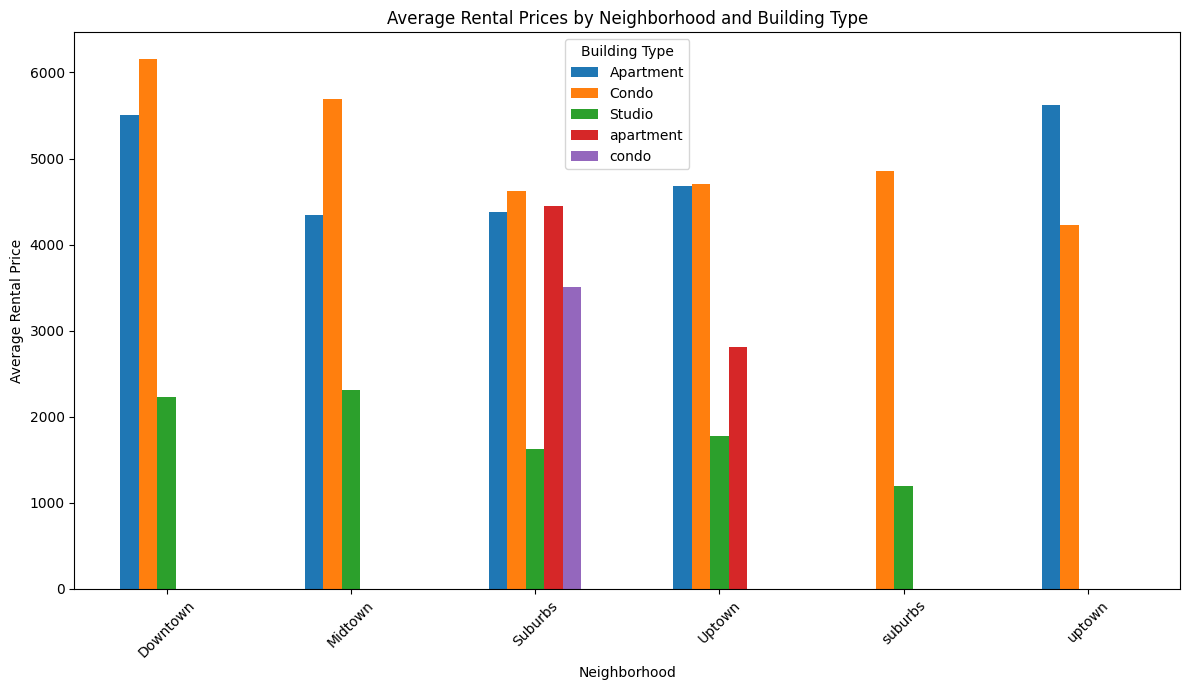

In [12]:
#pivot table plotting
pivot_table.plot(kind="bar", figsize=(12, 7))
plt.title("Average Rental Prices by Neighborhood and Building Type")
plt.xlabel("Neighborhood")
plt.ylabel("Average Rental Price")
plt.xticks(rotation=45)
plt.legend(title="Building Type")
plt.tight_layout()
plt.show()

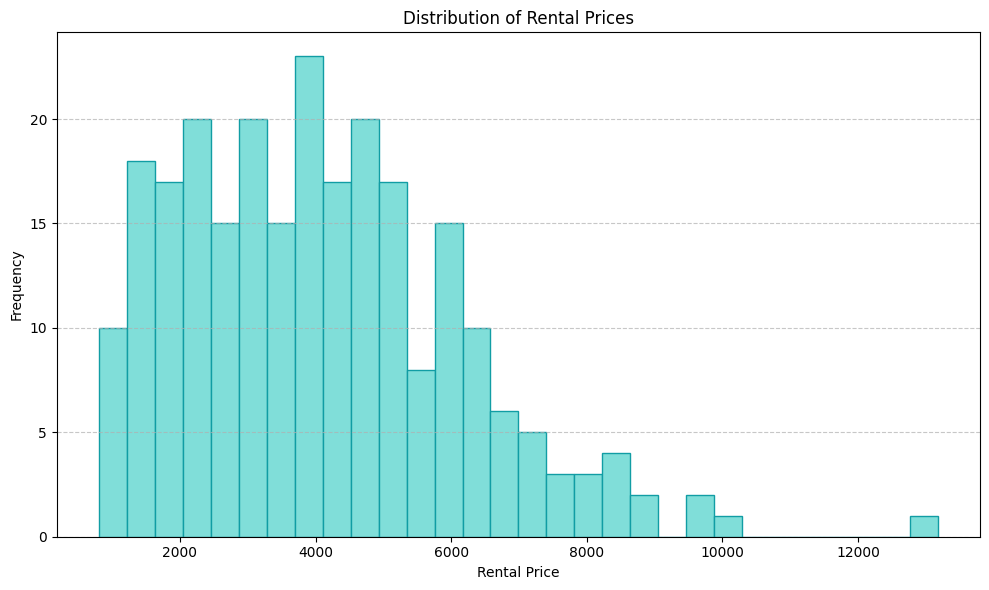

In [49]:
#-------------------------------------------------------------------------------------------------------------------------#
#b)

#creating the histogram for the rental_prices
df['Rental_Price'].plot(kind='hist', bins=30, figsize=(10, 6), color='#80ded9', edgecolor='#119da4')
plt.title('Distribution of Rental Prices')
plt.xlabel('Rental Price')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

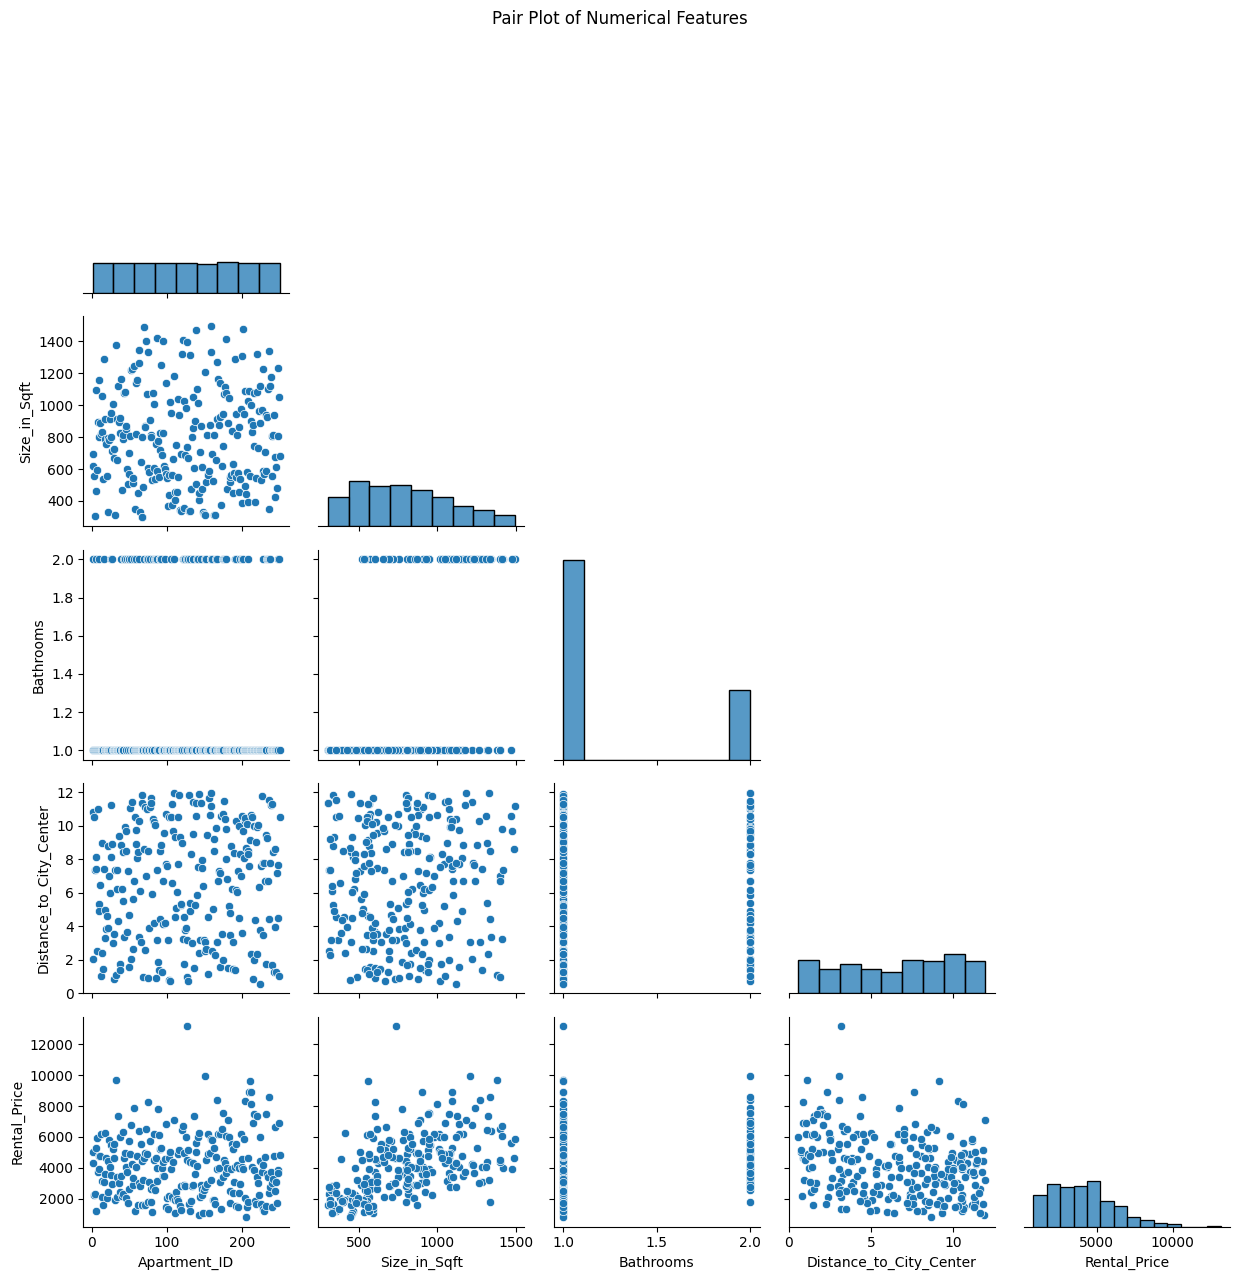

In [48]:
#-------------------------------------------------------------------------------------------------------------------------#
#C)

# Select only numerical features
numeric_df = df.select_dtypes(include=['float64', 'int64'])

#numeric_df.columns - to view whether the correct columns were selected

# Create the pair plot
sns.pairplot(numeric_df, diag_kind="hist", corner=True)

# Show the plot
plt.suptitle("Pair Plot of Numerical Features", y=1.02)
plt.tight_layout()
plt.show()


In [37]:
#-------------------------------------------------------------------------------------------------------------------------#
# d)

# Normalize the furnishing status for consistency
df["Furnished"] = df["Furnished"].str.title()

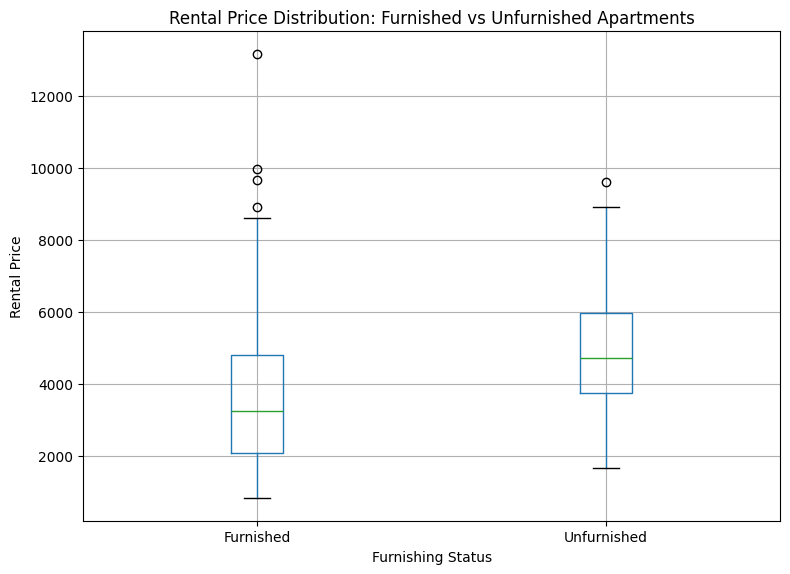

In [51]:
#creatin the box plot
df.boxplot(column="Rental_Price", by="Furnished", figsize=(8, 6), grid=True)
plt.title("Rental Price Distribution: Furnished vs Unfurnished Apartments")
plt.suptitle("")
plt.xlabel("Furnishing Status")
plt.ylabel("Rental Price")
plt.tight_layout()
plt.show()

In [52]:
#-------------------------------------------------------------------------------------------------------------------------#
# e)

#using the numeric_df used in the previous question
correlation_matrix = numeric_df.corr()


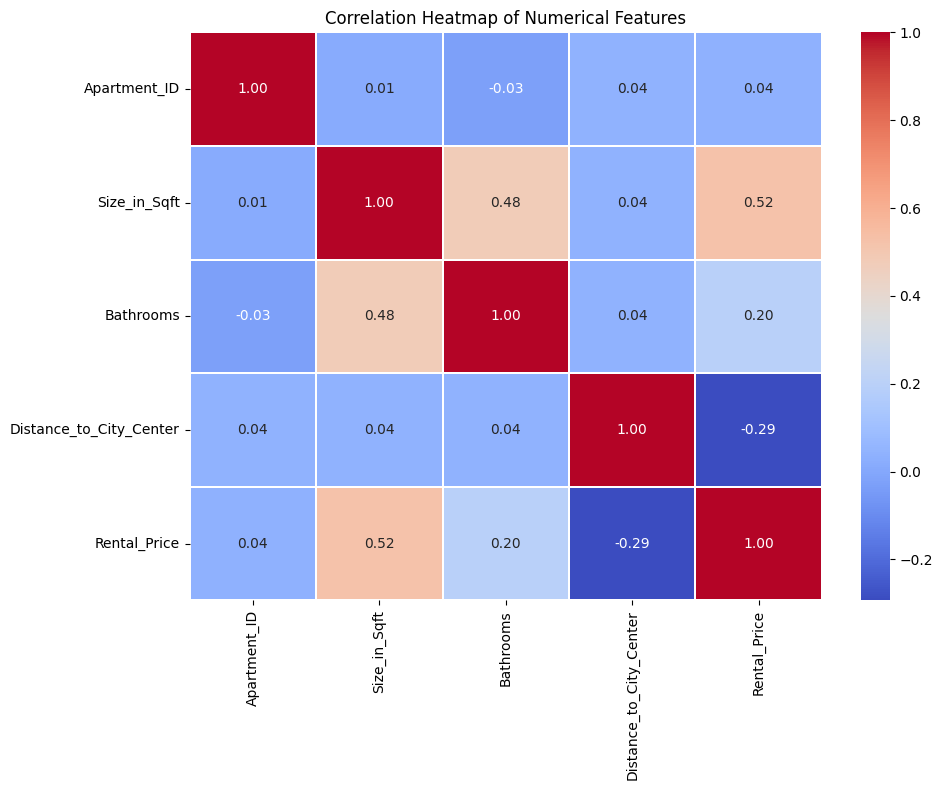

In [57]:
# Plotting the heat map
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f",linewidths=0.25)
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()